<a href="https://colab.research.google.com/github/MatiasFloresFarias/01-Simulacion-MVC-JAVA-SPRING-/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print("sys: {}".format(sys.version))

import scipy
print("scipy: {}".format(scipy.__version__))

import numpy as np
print("numpy: {}".format(np.__version__))

import matplotlib
print("matplotlib: {}".format(matplotlib.__version__))

import pandas
print("pandas: {}".format(pandas.__version__))

import sklearn

sys: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5


In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
x,y = make_blobs(n_samples=40, centers=2, random_state=20)

In [ ]:
x.shape

(40, 2)

In [ ]:
x[:, 1].shape

(40,)

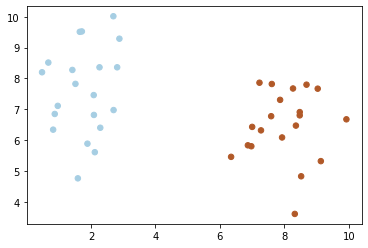

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [ ]:
cls = SVC(kernel = 'linear', C=1000)
cls.fit(x,y)

SVC(C=1000, kernel='linear')

In [ ]:
newData = [[3,4], [5,6]]
cls.predict(newData)

array([0, 1])

In [ ]:
cls.decision_function(newData)

array([-0.33816737,  0.26433501])

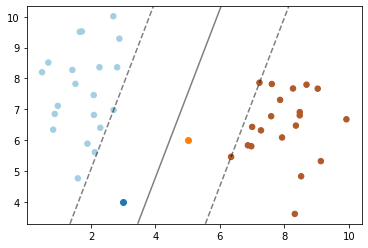

In [ ]:
x,y = make_blobs(n_samples=40, centers=2, random_state=20)

cls = SVC(kernel = 'linear', C=1000)
cls.fit(x,y)

plt.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=plt.cm.Paired)

newData = [[3,4], [5,6]]

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cls.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha = 0.5, linestyles=['--', '-', '--'])

ax.scatter(cls.support_vectors_[:, 0], cls.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
ax.scatter(3,4)
ax.scatter(5,6)
plt.show()

In [ ]:
cancer_data = datasets.load_breast_cancer()

In [ ]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
cancer_data.data[0:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(cancer_data.data, cancer_data.target, test_size = 0.4, random_state = 6)

In [ ]:
cls = SVC(kernel = 'linear')

In [ ]:
cls.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
pred = cls.predict(x_test)

In [ ]:
print("acuracy:", accuracy_score(y_test, y_pred=pred))

acuracy: 0.9517543859649122


In [ ]:
cls.support_

array([  8,   9,  20,  35,  65,  68, 105, 116, 131, 142, 149, 159, 165,
       194, 230, 237, 243, 249, 271, 313,   0,  39,  43,  55,  60,  98,
       107, 115, 137, 145, 205, 218, 251, 275, 276, 282, 309, 317, 322],
      dtype=int32)

In [ ]:
cls.support_vectors_[0]

array([1.386e+01, 1.693e+01, 9.096e+01, 5.789e+02, 1.026e-01, 1.517e-01,
       9.901e-02, 5.602e-02, 2.106e-01, 6.916e-02, 2.563e-01, 1.194e+00,
       1.933e+00, 2.269e+01, 5.960e-03, 3.438e-02, 3.909e-02, 1.435e-02,
       1.939e-02, 4.560e-03, 1.575e+01, 2.693e+01, 1.044e+02, 7.501e+02,
       1.460e-01, 4.370e-01, 4.636e-01, 1.654e-01, 3.630e-01, 1.059e-01])